In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_colwidth', 200)
sns.set_style("whitegrid")

Chargement des données 

In [8]:
try:
    df = pd.read_csv("train (1).csv")
except FileNotFoundError:
    raise FileNotFoundError("Le fichier train (1).csv n'a pas été trouvé. Vérifiez le chemin.")

print("\n=== Forme du DataFrame ===")
print("Nombre de lignes, colonnes:", df.shape)
print("\nNoms des colonnes:", df.columns.tolist())
print("\nAperçu des données:")
print(df.head(3))

assert df.shape[0] > 0, "Le DataFrame est vide"
assert {'text', 'target'}.issubset(df.columns), "Colonnes 'text' ou 'target' manquantes"

FileNotFoundError: Le fichier train (1).csv n'a pas été trouvé. Vérifiez le chemin.

Analyse des valeurs manquantes

In [ ]:
print("\n=== Valeurs manquantes ===")
missing_values = df.isnull().sum()
print(missing_values)

assert df['text'].isnull().sum() == 0, "Il y a des textes manquants"
assert df['target'].isnull().sum() == 0, "Il y a des cibles manquantes"



=== Valeurs manquantes ===
id             0
keyword       61
location    2533
text           0
target         0
dtype: int64


Analyse et suppression des doublons

In [ ]:
print("\n=== Doublons ===")
duplicates_count = df.duplicated().sum()
print("Nombre de doublons:", duplicates_count)

if duplicates_count > 0:
    df = df.drop_duplicates()
    print(f"{duplicates_count} doublons supprimés")


=== Doublons ===
Nombre de doublons: 0


Analyse des longueurs de texte et visualisation


=== Longueur des textes ===
count    7613.000000
mean      101.037436
std        33.781325
min         7.000000
25%        78.000000
50%       107.000000
75%       133.000000
max       157.000000
Name: text_length, dtype: float64


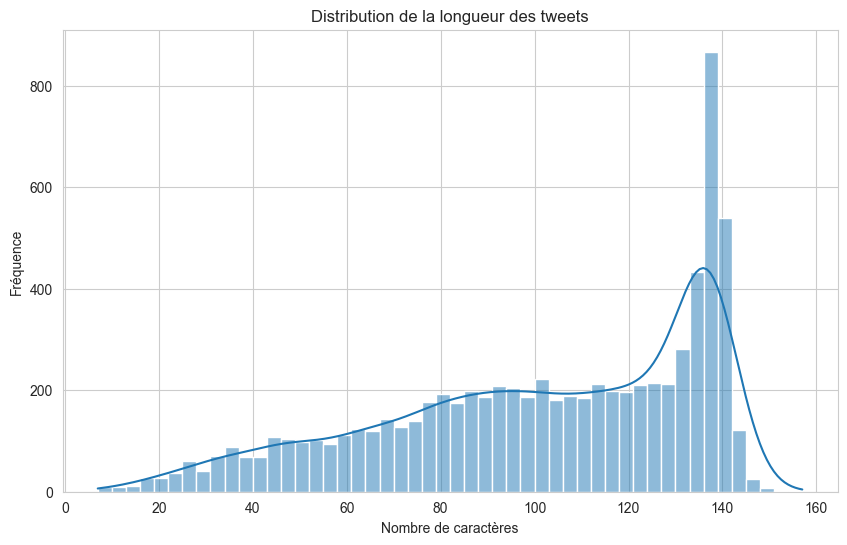

In [ ]:
print("\n=== Longueur des textes ===")
df['text_length'] = df['text'].apply(len)
print(df['text_length'].describe())

plt.figure(figsize=(10, 6))
sns.histplot(df['text_length'], bins=50, kde=True)
plt.title("Distribution de la longueur des tweets")
plt.xlabel("Nombre de caractères")
plt.ylabel("Fréquence")
plt.show()


Tweets extrêmes et tests

In [ ]:
print("\nTweets les plus courts:")
print(df[df['text_length'] == df['text_length'].min()]['text'].head(3))

print("\nTweets les plus longs:")
print(df[df['text_length'] == df['text_length'].max()]['text'].head(3))

assert df['text_length'].min() > 0, "Il y a des textes vides"
assert df['text_length'].max() < 1000, "Certains tweets semblent anormalement longs"


Tweets les plus courts:
1882    Crushed
4890    Bad day
5115    Err:509
Name: text, dtype: object

Tweets les plus longs:
1270    when you're taking a shower and someone flushes the toilet and you have .1 second to GTFO or you get burned??????????????????????????????????????????????????
Name: text, dtype: object


Analyse de la variable cible et visualisation


=== Répartition des classes ===
target
0    0.57034
1    0.42966
Name: proportion, dtype: float64


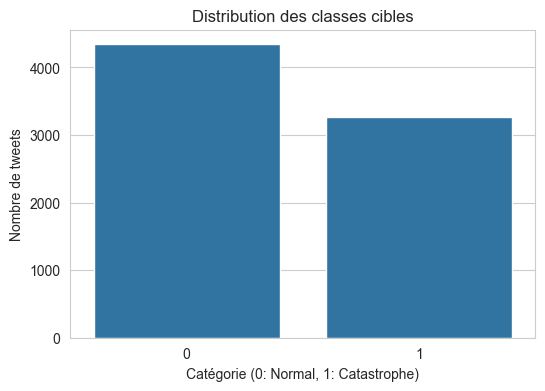

In [ ]:
print("\n=== Répartition des classes ===")
class_distribution = df['target'].value_counts(normalize=True)
print(class_distribution)

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='target')
plt.title("Distribution des classes cibles")
plt.xlabel("Catégorie (0: Normal, 1: Catastrophe)")
plt.ylabel("Nombre de tweets")
plt.show()

assert df['target'].nunique() == 2, "Le problème doit être binaire (2 classes)"
assert set(df['target'].unique()) == {0, 1}, "Les classes doivent être 0 et 1"


Exemples aléatoires

In [ ]:
print("\n=== Exemples aléatoires ===")
print("\nTweets de catastrophe (target=1):")
print(df[df['target'] == 1].sample(3)[['text', 'target']])

print("\nTweets normaux (target=0):")
print(df[df['target'] == 0].sample(3)[['text', 'target']])

df.to_csv("tweets.csv", index=False)
print("\nDonnées nettoyées sauvegardées dans cleaned_tweets.csv")


=== Exemples aléatoires ===

Tweets de catastrophe (target=1):
                                                                                                                  text  \
6771                                                          Maybe that's what happens when a tornado meets a volcano   
5254                            SYD traffic HAZARD Oil spill - BANKSTOWN Stacey St at Wattle St http://t.co/TZyHdBW9f5   
5561  Nigeria: Rainstorm Destroys 600 Houses in Yobe State: [Daily Trust] Damaturu -Over 600Û_ http://t.co/BBQnK76qUS   

      target  
6771       1  
5254       1  
5561       1  

Tweets normaux (target=0):
                                                                                                                                                text  \
831                                                                                          Lizard Wizard in a Blizzard #LWB http://t.co/MgR809yc5a   
1069                                                   

Partie 2 – Traitement de texte 

In [ ]:
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt

import nltk
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MSI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Fonction de nettoyage

In [ ]:
def clean_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = text.split()
    tokens = [
        token for token in tokens
        if token.isalpha() and len(token) > 2 and token not in stop_words
    ]
    tokens = [stemmer.stem(token) for token in tokens]
    return tokens


 Application du nettoyage sur les tweets

In [ ]:
df['clean_tokens'] = df['text'].astype(str).apply(clean_text)
print("\n Prétraitement appliqué avec succès")



 Prétraitement appliqué avec succès


Analyse des tokens

In [ ]:
all_tokens = [token for sublist in df['clean_tokens'] for token in sublist]
token_counts = Counter(all_tokens)
unique_tokens = set(all_tokens)

print(f"\n Nombre total de tokens : {len(all_tokens)}")
print(f" Nombre de tokens uniques : {len(unique_tokens)}")
print(f" Nombre de tokens apparaissant une seule fois : {sum(1 for t in token_counts.values() if t == 1)}")



 Nombre total de tokens : 66276
 Nombre de tokens uniques : 13631
 Nombre de tokens apparaissant une seule fois : 8633


Visualisation WordCloud

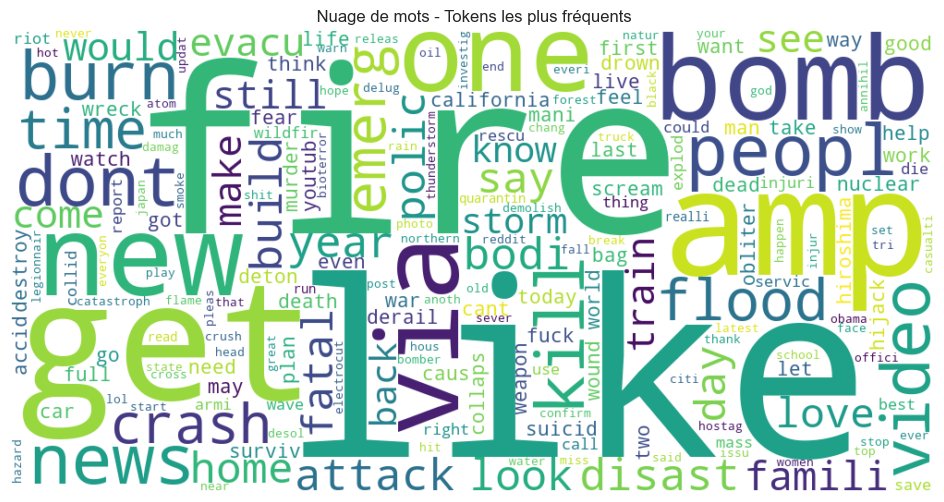

In [ ]:
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate_from_frequencies(token_counts)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(" Nuage de mots - Tokens les plus fréquents")
plt.show()


Tests unitaires

In [ ]:
def test_clean_text_function():
    test_input = "Hello!!! This is a test tweet with numbers 123 and stopwords like the, is, and."
    tokens = clean_text(test_input)
    assert all(len(token) > 2 for token in tokens), "Il reste des mots courts"
    assert all(token not in stop_words for token in tokens), "Il reste des stopwords"
    assert all(token.isalpha() for token in tokens), "Il reste des chiffres ou symboles"
    print("Test clean_text() : OK")

def test_vocabulary_reduction():
    raw_vocab_size = len(set(" ".join(df['text'].str.lower()).split()))
    cleaned_vocab_size = len(set([tok for sublist in df['clean_tokens'] for tok in sublist]))
    assert cleaned_vocab_size < raw_vocab_size, "Le vocabulaire n’a pas été réduit"
    print("Réduction du vocabulaire : OK")

test_clean_text_function()
test_vocabulary_reduction()

df.to_csv("tweets_tokens.csv", index=False)
print("\nDonnées enrichies sauvegardées dans tweets_cleaned_tokens.csv")


Test clean_text() : OK
Réduction du vocabulaire : OK

Données enrichies sauvegardées dans tweets_cleaned_tokens.csv


In [ ]:
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt

import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MSI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

PARTIE 3 MODELING

In [ ]:
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MSI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def clean_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = text.split()
    tokens = [
        token for token in tokens
        if token.isalpha() and len(token) > 2 and token not in stop_words
    ]
    tokens = [stemmer.stem(token) for token in tokens]
    return tokens


Initialisation et fonction de nettoyage

In [ ]:
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def clean_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = text.split()
    tokens = [
        token for token in tokens
        if token.isalpha() and len(token) > 2 and token not in stop_words
    ]
    tokens = [stemmer.stem(token) for token in tokens]
    return tokens


Application nettoyage + analyse + visualisation



Prétraitement appliqué avec succès

Nombre total de tokens : 66276
Nombre de tokens uniques : 13631
Nombre de tokens apparaissant une seule fois : 8633


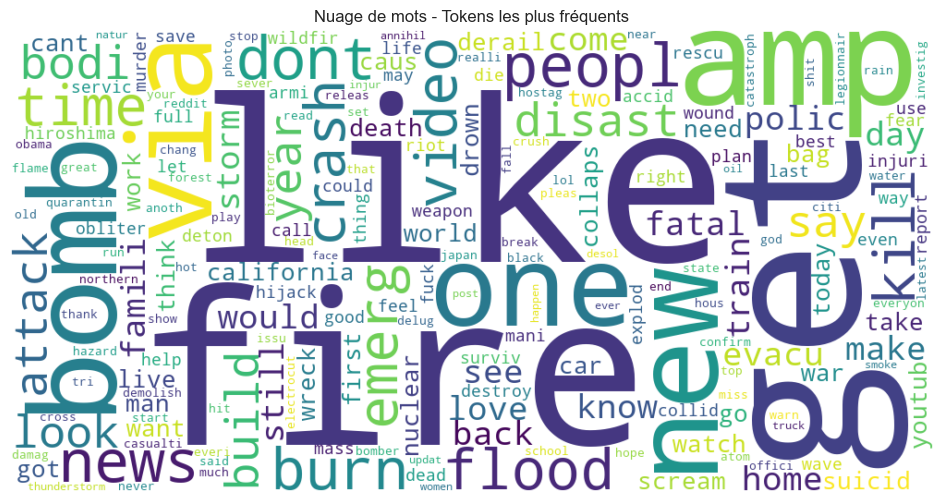

In [ ]:
df['clean_tokens'] = df['text'].astype(str).apply(clean_text)
print("\nPrétraitement appliqué avec succès")

all_tokens = [token for sublist in df['clean_tokens'] for token in sublist]
token_counts = Counter(all_tokens)
unique_tokens = set(all_tokens)

print(f"\nNombre total de tokens : {len(all_tokens)}")
print(f"Nombre de tokens uniques : {len(unique_tokens)}")
print(f"Nombre de tokens apparaissant une seule fois : {sum(1 for t in token_counts.values() if t == 1)}")

wordcloud = WordCloud(width=1000, height=500, background_color='white').generate_from_frequencies(token_counts)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Nuage de mots - Tokens les plus fréquents")
plt.show()


TESTS

In [ ]:
def test_pipeline_training():
    try:
        pipeline.fit(X_train, y_train)
        print("Pipeline entraîné avec succès")
    except Exception as e:
        print("Erreur pendant l'entraînement :", e)

def test_prediction_shape():
    preds = pipeline.predict(X_test)
    assert preds.shape == y_test.shape, "Forme des prédictions incorrecte"
    print("Forme des prédictions correcte")

def test_metrics_format():
    acc = accuracy_score(y_test, y_pred)
    assert isinstance(acc, float), "Accuracy n'est pas un float"
    print("Métriques retournées correctement")

def test_empty_input():
    short_inputs = ["", "ok", "help", "boom", "lol"]
    pred = pipeline.predict(short_inputs)
    assert len(pred) == len(short_inputs), "Mauvais nombre de prédictions"
    print("Le modèle gère bien les textes très courts ou vides")


Exécution des tests

In [ ]:
print("\nTests unitaires :")
test_pipeline_training()
test_prediction_shape()
test_metrics_format()
test_empty_input()



Tests unitaires :
Pipeline entraîné avec succès
Forme des prédictions correcte
Métriques retournées correctement
Le modèle gère bien les textes très courts ou vides
